### Modules needed:
1. Numpy
2. Pandas
3. Matplotlib
4. Scipy (for curve_fit function)
5. Sklearn (optional, just to simplify R^2 calculation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

## 1. Load the reference data

In this example, we are using two datasets for CO2 Adsorption at 298K and 313K

In [2]:
T1 = 298 # Kelvin
T2 = 313 # Kelvin

data_T1 = {'CO2_loading_mol': [0.073, 0.221, 0.728, 1.060, 2.094, 3.087, 4.616, 6.292, 8.815, 12.995, 14.393, 15.906],
        'pressure': [0.051, 0.153, 0.515, 0.762, 1.546, 2.494, 3.799, 5.511, 8.401, 16.047, 19.997, 28.566]} #CO2 adsorption at 298K

data_T2 = {'CO2_loading_mol': [0.054, 0.152, 0.523, 0.756, 1.468, 2.351, 3.286, 4.732, 6.469, 10.342, 11.787, 13.752],
        'pressure': [0.051, 0.153, 0.515, 0.762, 1.546, 2.494, 3.799, 5.511, 8.401, 16.047, 19.997, 28.566]} # CO2 adsorption at 313K

Convert it to dataframe (for data transforming easiness) and check by plotting it

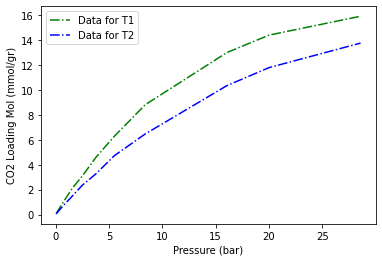

In [21]:
df_T1 = pd.DataFrame(data_T1)
df_T2 = pd.DataFrame(data_T2)

plt.figure()
plt.plot(df_T1['pressure'], df_T1['CO2_loading_mol'], 'g-.', label='Data for T1')
plt.plot(df_T2['pressure'], df_T2['CO2_loading_mol'], 'b-.', label='Data for T2')
plt.xlabel('Pressure (bar)')
plt.ylabel('CO2 Loading Mol (mmol/gr)')
plt.legend()
plt.show()

## 2. Create the Freundlich–Langmuir-type functions

In [4]:
def loading_mol(p, a, b, c): # where p in bar
    return (a * b * p**c) / (1 + (b * p**c))

In [5]:
def p_isotherm(n, a, b, c): # where n in mmol/gr
    return (n / (a*b - n*b))**(1/c)

Try to test the created functions with obtained parameters from our Origin trials

In [6]:
# test for existing parameter obtained from Origin for CO2 313K

test_a = 23.50294
test_b = 0.04083
test_c = 1.06181

loading_mol(test_a, test_b, test_c, 0.062) 

0.02301109763852323

In [7]:
# test for existing parameter obtained from Origin for CO2 313K

p_isotherm(test_a, test_b, test_c, 0.05) 

0.3120083970882192

## 3. Fit the reference data to obtain a, b, c constant value

This one is for T1 data

In [8]:
p0 = [1, 0.01, 0.01] #initial guess for a, b, c

c, cov = curve_fit(loading_mol, df_T1['pressure'].values, df_T1['CO2_loading_mol'].values, p0, maxfev=10000)

fit_a_T1, fit_b_T1, fit_c_T1 = c

print(c)
print('R^2 Score:', r2_score(df_T1['CO2_loading_mol'].values, loading_mol(df_T1['pressure'].values, *c)))

[22.04513417  0.05879994  1.14296621]
R^2 Score: 0.9994494026621535


Prediction result table dataframe for T1

In [9]:
df_T1['predicted_loading_mol'] = loading_mol(df_T1['pressure'].values , fit_a_T1, fit_b_T1, fit_c_T1)
df_T1

,CO2_loading_mol,pressure,predicted_loading_mol
0,0.073,0.051,0.043116
1,0.221,0.153,0.150606
2,0.728,0.515,0.590875
3,1.060,0.762,0.910842
4,2.094,1.546,1.944658
5,3.087,2.494,3.156568
6,4.616,3.799,4.691483
7,6.292,5.511,6.450080
8,8.815,8.401,8.841787
9,12.995,16.047,12.871668


This one is for T2 data

In [10]:
p0 = [1, 0.01, 0.01] #initial guess for a, b, c

c, cov = curve_fit(loading_mol, df_T2['pressure'].values, df_T2['CO2_loading_mol'].values, p0)

fit_a_T2, fit_b_T2, fit_c_T2 = c

print(c)
print('R^2 Score:', r2_score(df_T2['CO2_loading_mol'].values, loading_mol(df_T2['pressure'].values, *c)))

[23.50067108  0.04083061  1.06187962]
R^2 Score: 0.9997057474934566


In [11]:
df_T2['predicted_loading_mol'] = loading_mol(df_T1['pressure'].values , fit_a_T2, fit_b_T2, fit_c_T2)
df_T2

,CO2_loading_mol,pressure,predicted_loading_mol
0,0.054,0.051,0.040636
1,0.152,0.153,0.129986
2,0.523,0.515,0.464903
3,0.756,0.762,0.697636
4,1.468,1.546,1.431185
5,2.351,2.494,2.286010
6,3.286,3.799,3.388342
7,4.732,5.511,4.701375
8,6.469,8.401,6.609557
9,10.342,16.047,10.283055


## 4. Plot the result to check regression with the data

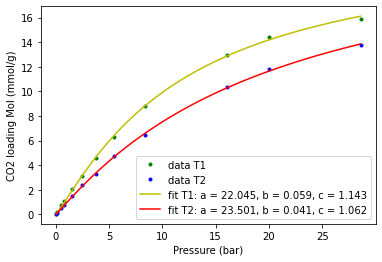

In [12]:
test_x_T1 = np.linspace(df_T1['pressure'].min(), df_T1['pressure'].max(), 100)
test_x_T2 = np.linspace(df_T2['pressure'].min(), df_T2['pressure'].max(), 100)

plt.figure()
plt.plot(df_T1['pressure'].values, df_T1['CO2_loading_mol'].values, 'g.', label='data T1')
plt.plot(df_T2['pressure'].values, df_T2['CO2_loading_mol'].values, 'b.', label='data T2')
plt.plot(test_x_T1, loading_mol(test_x_T1 , fit_a_T1, fit_b_T1, fit_c_T1), 'y-', label=f'fit T1: a = {fit_a_T1:.3f}, b = {fit_b_T1:.3f}, c = {fit_c_T1:.3f}')
plt.plot(test_x_T2, loading_mol(test_x_T2 , fit_a_T2, fit_b_T2, fit_c_T2), 'r-', label=f'fit T2: a = {fit_a_T2:.3f}, b = {fit_b_T2:.3f}, c = {fit_c_T2:.3f}')
plt.xlabel('Pressure (bar)')
plt.ylabel('CO2 loading Mol (mmol/g)')
plt.legend()
plt.show()

## 5. Calculate and Plot Enthalpy of Adsorption

In [13]:
def heat_of_adsorption(p1, p2, T1, T2, R):
    enthalpy = (-R * np.log(p2/p1) * (T1 * T2) / (T2-T1)) # J/mol
    return enthalpy / 1000 # to KJ/mol

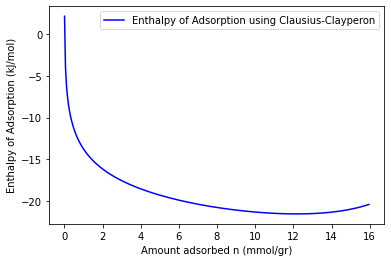

In [14]:
R = 8.314 # J/mol/K
test_n = np.arange(0.01, 16, 0.05)
fit_p1 = p_isotherm(test_n, fit_a_T1, fit_b_T1, fit_c_T1)
fit_p2 = p_isotherm(test_n, fit_a_T2, fit_b_T2, fit_c_T2)
result_enthalpy = heat_of_adsorption(fit_p1, fit_p2, T1, T2, R)

plt.figure()
plt.plot(test_n, result_enthalpy, 'b-', label='Enthalpy of Adsorption using Clausius-Clayperon')
plt.xlabel('Amount adsorbed n (mmol/gr)')
plt.ylabel('Enthalpy of Adsorption (kJ/mol)')
plt.legend()
plt.show()

In [15]:
df_enthalpy = pd.DataFrame({'loading (mmol/g)': test_n, 'isothermal pressure T1 (bar)': fit_p1,
                            'isothermal pressure T2 (bar)': fit_p2, 'Enthalpy of Adsorption (kJ/mol)': result_enthalpy})

df_enthalpy

,loading (mmol/g),isothermal pressure T1 (bar),isothermal pressure T2 (bar),Enthalpy of Adsorption (kJ/mol)
0,0.01,0.014182,0.013602,2.158820
1,0.06,0.068144,0.073669,-4.030866
2,0.11,0.116039,0.130636,-6.125420
3,0.16,0.161378,0.186287,-7.420565
4,0.21,0.205136,0.241144,-8.360767
...,...,...,...,...
315,15.76,26.668316,39.705914,-20.577308
316,15.81,26.929857,40.068313,-20.542479
317,15.86,27.195255,40.435249,-20.506763
318,15.91,27.464600,40.806809,-20.470143
